In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
#MUSIC PROCESS
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
import ffmpeg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\"))
import librosa
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import skew
SAMPLE_RATE = 22050

#from sklearn.model_selection import KFold, RepeatedKFold
from tqdm import tqdm, tqdm_pandas

tqdm.pandas()
import scipy
data_path = 'C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\'
ss = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'))

import lightgbm as lgb

In [2]:
os.getcwd()

'C:\\Users\\pedne\\Python\\Competition\\hackerearth'

In [3]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset')

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
data = pd.read_csv("C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\train.csv")

In [6]:
#loading data
audio_train_files = os.listdir('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\TrainAudioFiles')
audio_test_files = os.listdir('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\TestAudioFiles')

train = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\train.csv')
test = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\test.csv')

submission = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\sample_submission.csv')

In [7]:
train.rename(columns={'filename': 'fname','emotion': 'label'}, inplace=True)
test.rename(columns={'filename': 'fname'}, inplace=True)
ss.rename(columns={'filename': 'fname'}, inplace=True)

In [8]:
def read_audio(conf, pathname, trim_long_data):
    y, sr = librosa.load(pathname, sr=conf.sampling_rate)
    # trim silence
    if 0 < len(y): # workaround: 0 length causes error
        y, _ = librosa.effects.trim(y) # trim, top_db=default(60)
    # make it unified length to conf.samples
    if len(y) > conf.samples: # long enough
        if trim_long_data:
            y = y[0:0+conf.samples]
    else: # pad blank
        padding = conf.samples - len(y)    # add padding at both ends
        offset = padding // 2
        y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')
    return y

In [9]:
class conf:
    # Preprocessing settings
    sampling_rate = 22050
    duration = 2
    hop_length = 347*duration # to make time steps 128
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 20
    n_fft = n_mels * 20
    samples = sampling_rate * duration

In [10]:
def audio_to_melspectrogram(conf, audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=conf.sampling_rate,
                                                 n_mels=conf.n_mels,
                                                 hop_length=conf.hop_length,
                                                 n_fft=conf.n_fft,
                                                 fmin=conf.fmin,
                                                 fmax=conf.fmax)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

def read_as_melspectrogram(conf, pathname, trim_long_data):
    x = read_audio(conf, pathname, trim_long_data)
    mels = audio_to_melspectrogram(conf, x)
    
    return mels

In [11]:
#returns mfcc features with mean and standard deviation along time
def get_mfcc(name, path):
    b, _ = librosa.core.load(path + name, sr = SAMPLE_RATE)
    assert _ == SAMPLE_RATE
    try:
        ft1 = librosa.feature.mfcc(b, sr = SAMPLE_RATE, n_mfcc=20)
        ft2 = librosa.feature.zero_crossing_rate(b)[0]
        ft3 = librosa.feature.spectral_rolloff(b)[0] #102/103
        ft4 = librosa.feature.spectral_centroid(b)[0]
        #ft5 = librosa.feature.spectral_contrast(b)[0]
        ft6 = librosa.feature.spectral_bandwidth(b)[0] #106/107
        
        #New features 
        ft7 = librosa.feature.spectral_flatness(b)[0] #108/109
        ft8 = librosa.feature.melspectrogram(b, sr = SAMPLE_RATE, n_mels=20) #110-209
        
        stft = np.abs(librosa.stft(b))
        ft9 = librosa.feature.chroma_stft(S=stft, sr = SAMPLE_RATE, n_chroma=20)
        
        ft1_trunc = np.hstack((np.mean(ft1, axis=1), np.std(ft1, axis=1), skew(ft1, axis = 1), np.max(ft1, axis = 1), np.min(ft1, axis = 1)))
        ft2_trunc = np.hstack((np.mean(ft2), np.min(ft2)))
        ft3_trunc = np.hstack((np.mean(ft3), np.min(ft3)))
        ft4_trunc = np.hstack((np.mean(ft4), np.min(ft4)))
        #ft5_trunc = np.hstack((np.mean(ft5), np.std(ft5), skew(ft5), np.max(ft5), np.min(ft5)))
        ft6_trunc = np.hstack((np.mean(ft6), np.min(ft6)))
        
        # New features
        ft7_trunc = np.hstack((np.mean(ft7), np.std(ft7), skew(ft7), np.max(ft7), np.min(ft7)))
        ft8_trunc = np.hstack((np.mean(ft8, axis=1), np.min(ft8, axis = 1)))
        ft9_trunc = np.hstack((np.mean(ft9, axis=1), np.min(ft9, axis = 1)))
        
        # Trim silence and find melsprctogram starts
        
        ft10 = read_as_melspectrogram(conf, path + name, trim_long_data=False)
        #print("ft10 = " , ft10)
        ft10_trunc = np.hstack((np.mean(ft10, axis=1), np.min(ft10, axis = 1)))
      
        # Trim silence and find melsprctogram ends
    
        #New features
        return pd.Series(np.hstack((ft1_trunc, ft2_trunc, ft3_trunc, ft4_trunc,  ft6_trunc, ft7_trunc, ft8_trunc , ft9_trunc, ft10_trunc)))
     
    except:
        print('bad file')
        return pd.Series([0]*125)

In [12]:
#temp = train[0:1]
#temp.head()

In [13]:
#preparing data
train_data = pd.DataFrame()
train_data['fname'] = train['fname']

test_data = pd.DataFrame()
test_data['fname'] = test['fname']

train_data = train_data['fname'].progress_apply(get_mfcc, path='C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\TrainAudioFiles\\')
#train_data = temp['fname'].progress_apply(get_mfcc, path='C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\TrainAudioFiles\\')

print('done loading train mfcc')

test_data = test_data['fname'].progress_apply(get_mfcc, path='C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\TestAudioFiles\\')
print('done loading test mfcc')

train_data['fname'] = train['fname']
test_data['fname']  = test['fname']
train_data['label'] = train['label']


  0%|                                                                                         | 0/2492 [00:00<?, ?it/s]

done loading train mfcc


100%|██████████████████████████████████████████████████████████████████████████████| 2492/2492 [30:00<00:00,  1.38it/s]

done loading test mfcc


In [14]:
test_data['label'] = np.zeros((len(test_data['fname'])))

In [15]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,fname,label
0,-278.796112,120.623276,-30.605551,37.689148,-6.903615,2.928416,-5.244886,7.935375,-9.720874,-0.945975,...,-54.153595,-50.619835,-60.292282,-62.643433,-64.655289,-64.773575,-71.402229,-74.097435,18777.mp3,neutral
1,-285.614441,77.699921,-23.451555,20.549053,-13.299813,-0.887833,-19.577496,-5.765523,-13.445677,3.818116,...,-61.515381,-63.032700,-64.380356,-66.966133,-71.243958,-71.101196,-74.513695,-77.471870,24041.mp3,neutral
2,-357.592712,116.686470,-8.769591,66.443596,-8.505707,-8.771907,-10.832947,-7.604220,-12.797084,-4.985988,...,-90.712402,-90.712402,-90.712402,-90.712402,-90.712402,-90.712402,-90.712402,-90.712402,1621.mp3,joy
3,-230.630127,108.982880,-39.056355,7.575649,-23.739586,2.977375,-8.159317,-10.359438,-7.995903,5.702702,...,-81.881081,-81.881081,-81.881081,-81.881081,-81.881081,-81.881081,-81.881081,-81.881081,28883.mp3,neutral
4,-389.335205,79.616753,-0.578545,17.435398,-13.201138,12.474411,-2.183748,4.992917,-6.689447,10.516625,...,-70.008537,-68.638138,-68.355469,-70.867706,-72.031403,-71.705627,-72.285156,-76.406013,14918.mp3,neutral


In [16]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,fname,label
0,-356.842743,112.359329,-42.245010,22.662325,-15.842854,2.291779,-5.008827,0.557192,-7.254229,1.501152,...,-83.953964,-83.953964,-83.953964,-83.953964,-83.953964,-83.953964,-83.953964,-83.953964,26199.mp3,0.0
1,-341.047089,111.733551,-57.339275,20.692600,-9.852555,-5.630715,-12.686045,-6.143411,0.775174,-0.219415,...,-68.869438,-68.317749,-70.847481,-71.397392,-73.509178,-77.765167,-79.407867,-81.996521,692.mp3,0.0
2,-238.803711,120.987534,-58.344601,19.175531,-15.501564,-4.162464,-20.400166,-8.162831,-15.384065,9.647953,...,-81.700256,-81.700256,-81.700256,-81.700256,-81.700256,-81.700256,-81.700256,-81.700256,16821.mp3,0.0
3,-346.435577,106.960724,-21.707466,21.547131,-11.911418,7.539923,-8.576424,4.529125,-8.213707,3.965783,...,-89.267296,-89.267296,-89.267296,-89.267296,-89.267296,-89.267296,-89.267296,-89.267296,1608.mp3,0.0
4,-396.133698,124.292557,2.149979,53.832451,-5.106902,17.754637,-16.059040,6.473380,-10.482105,4.353210,...,-65.674774,-65.446915,-66.720688,-65.882019,-63.977737,-66.187157,-76.257149,-79.863129,47947.wav,0.0


In [17]:
#Features from LightGBM baseline kernel: https://www.kaggle.com/opanichev/lightgbm-baseline
# MAPk from https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py
from scipy.stats import skew, kurtosis
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


def extract_features(files, path):
    features = {}

    cnt = 0
    for f in tqdm(files):
        features[f] = {}

        data, fs = librosa.load(os.path.join(path, f))
        #print("fs = ", fs)
        #print("data = ", data)

        abs_data = np.abs(data)
        #print("abs_data = ", abs_data)
        diff_data = np.diff(data)
        #print("diff_data = ", diff_data)

        def calc_part_features(data, n=2, prefix=''):
            f_i = 1
            for i in range(0, len(data), len(data)//n):
                features[f]['{}mean_{}_{}'.format(prefix, f_i, n)] = np.mean(data[i:i + len(data)//n])
                features[f]['{}std_{}_{}'.format(prefix, f_i, n)] = np.std(data[i:i + len(data)//n])
                features[f]['{}min_{}_{}'.format(prefix, f_i, n)] = np.min(data[i:i + len(data)//n])
                features[f]['{}max_{}_{}'.format(prefix, f_i, n)] = np.max(data[i:i + len(data)//n])

        features[f]['len']       = len(data)
        features[f]['skew']      = skew(data)
        features[f]['kurtosis']  = kurtosis(data)
        #features[f]['rms']       = np.sqrt(np.mean(data**2))
                
        if features[f]['len'] > 0:
            n = 1
            calc_part_features(data, n=n)
            calc_part_features(abs_data, n=n, prefix='abs_')
            calc_part_features(diff_data, n=n, prefix='diff_')

            #n = 2
            #calc_part_features(data, n=n)
            #calc_part_features(abs_data, n=n, prefix='abs_')
            #calc_part_features(diff_data, n=n, prefix='diff_')

            #n = 3
            #calc_part_features(data, n=n)
            #calc_part_features(abs_data, n=n, prefix='abs_')
            #calc_part_features(diff_data, n=n, prefix='diff_')


        cnt += 1

        # if cnt >= 1000:
        #     break

    features = pd.DataFrame(features).T.reset_index()
    features.rename(columns={'index': 'fname'}, inplace=True)
    
    return features

path = os.path.join(data_path, 'TrainAudioFiles')
train_files = train.fname.values
train_features = extract_features(train_files, path)

100%|██████████████████████████████████████████████████████████████████████████████| 5816/5816 [21:14<00:00,  4.56it/s]


In [18]:
path = os.path.join(data_path, 'TestAudioFiles')
test_files = ss.fname.values
test_features = extract_features(test_files, path)

100%|██████████████████████████████████████████████████████████████████████████████| 2492/2492 [09:06<00:00,  4.56it/s]


In [19]:
train_data = train_data.merge(train_features, on='fname', how='left')
test_data = test_data.merge(test_features, on='fname', how='left')
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,min_1_1,max_1_1,abs_mean_1_1,abs_std_1_1,abs_min_1_1,abs_max_1_1,diff_mean_1_1,diff_std_1_1,diff_min_1_1,diff_max_1_1
0,-278.796112,120.623276,-30.605551,37.689148,-6.903615,2.928416,-5.244886,7.935375,-9.720874,-0.945975,...,-0.205180,0.192366,0.021269,0.020098,5.771569e-07,0.205180,3.143570e-07,0.012109,-0.209019,0.221735
1,-285.614441,77.699921,-23.451555,20.549053,-13.299813,-0.887833,-19.577496,-5.765523,-13.445677,3.818116,...,-0.164547,0.231245,0.016560,0.019975,2.258659e-08,0.231245,2.137719e-07,0.013591,-0.178924,0.179749
2,-357.592712,116.686470,-8.769591,66.443596,-8.505707,-8.771907,-10.832947,-7.604220,-12.797084,-4.985988,...,-0.079534,0.103244,0.013539,0.013791,0.000000e+00,0.103244,4.445714e-07,0.007776,-0.060522,0.061334
3,-230.630127,108.982880,-39.056355,7.575649,-23.739586,2.977375,-8.159317,-10.359438,-7.995903,5.702702,...,-0.164544,0.203923,0.025743,0.028237,0.000000e+00,0.203923,1.558823e-08,0.012272,-0.094507,0.107406
4,-389.335205,79.616753,-0.578545,17.435398,-13.201138,12.474411,-2.183748,4.992917,-6.689447,10.516625,...,-0.168901,0.187573,0.006970,0.012630,9.170122e-09,0.187573,-6.743637e-08,0.006570,-0.115477,0.095399


In [20]:
# Save train and test files
train_data.to_csv('train_data_emotion_predict_5_164_final_min.csv',index=False)
test_data.to_csv('test_data_emotion_predict_5_164_final_min.csv',index=False)

In [21]:
train_data = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\train_data_emotion_predict_5_164_final_min.csv')
test_data = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\hackerearth\\dataset\\test_data_emotion_predict_5_164_final_min.csv')

In [23]:
#Split data into training, validation, and testing sets

def data_split(train_df, test_df, shuffle=True, test_size=0.25, random_state=0, verbose=True):
    # Get numpy array of X data
    X_train = train_df.drop(['fname', 'label'], axis=1).values
    X_test = test_df.drop(['fname', 'label'], axis=1).values
    feature_names = list(test_df.drop(['fname', 'label'], axis=1).columns.values)

    # Get numpy array of y data
    y_train = pd.get_dummies(train_df.label)
    labels = y_train.columns.values
    y_train = y_train.values

    y_train = [np.argmax(row) for row in y_train]
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=test_size,
                                                          random_state=random_state, shuffle=shuffle)
    if verbose:
        print("Train X shape = {}\nTrain y shape = {}".format(X_train.shape, len(y_train)))
        print("\nValid X shape = {}\nValid y shape = {}".format(X_valid.shape, len(y_valid)))

    assert X_train.shape[1] == X_valid.shape[1] == X_test.shape[1]
    assert len(y_train) == X_train.shape[0]
    assert len(y_valid) == X_valid.shape[0]
    
    return X_train, X_valid, y_train, y_valid, X_test, feature_names, labels

In [24]:
#Check feature importance
X_train, X_valid, y_train, y_valid, X_test, feature_names, labels = data_split(train_data, test_data)

Train X shape = (4362, 245)
Train y shape = 4362

Valid X shape = (1454, 245)
Valid y shape = 1454


In [25]:
def lgb_dset(X_train, X_valid, y_train, y_valid, feature_names):
    
    d_train = lgb.Dataset(X_train, label=y_train, feature_name=feature_names)
    d_valid = lgb.Dataset(X_valid, label=y_valid, feature_name=feature_names)

    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'max_depth': 5,
        'num_leaves': 31,
        'learning_rate': 0.025,
        'feature_fraction': 0.85,
        'bagging_fraction': 0.85,
        'bagging_freq': 5,
        'num_threads': os.cpu_count(),
        'lambda_l2': 1.0,
        'min_gain_to_split': 0,
        'num_class': 7,
    }
    
    return d_train, d_valid, params

In [26]:
d_train, d_valid, params = lgb_dset(X_train, X_valid, y_train, y_valid, feature_names)
clf = lgb.train(params, d_train, num_boost_round=500, valid_sets=d_valid, verbose_eval=500, early_stopping_rounds=100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62383
[LightGBM] [Info] Number of data points in the train set: 4362, number of used features: 245
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -2.273663
[LightGBM] [Info] Start training from score -2.929647
[LightGBM] [Info] Start training from score -2.867257
[LightGBM] [Info] Start training from score -1.798661
[LightGBM] [Info] Start training from score -0.790339
[LightGBM] [Info] Start training from score -2.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [27]:
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])


In [28]:
#Predict and score validation set
p = clf.predict(X_valid, num_iteration=clf.best_iteration)

predictions = [list(np.argsort(p[i])[::-1][:3]) for i in range(len(p))]
actual = [[i] for i in y_valid]

valid_score = mapk(actual, predictions, k=3)

print("Score = {:.4f}".format(valid_score))

Score = 0.6897


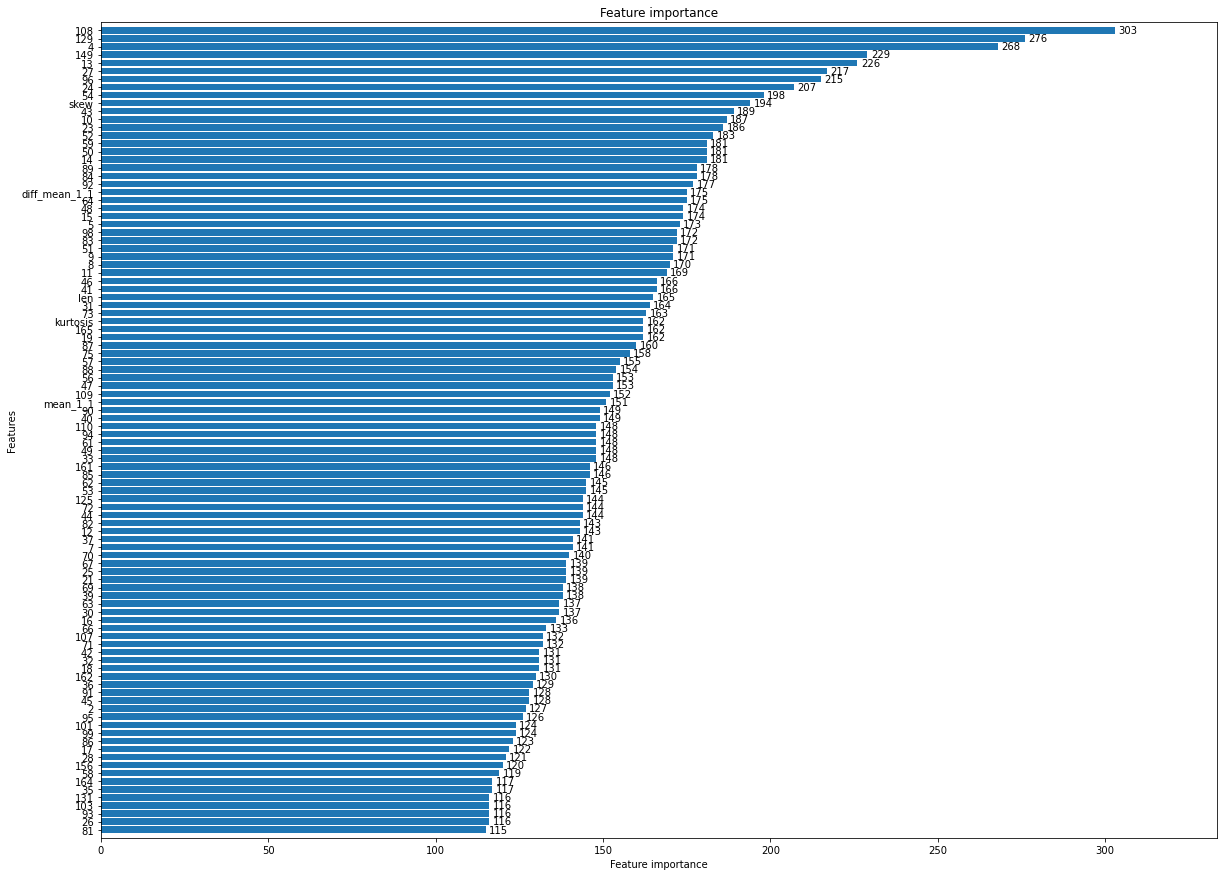

In [29]:
#LightGBM feature importances
ax = lgb.plot_importance(clf, max_num_features=100, grid=False, height=0.8, figsize=(20, 15))
plt.show()

In [30]:
#Functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
# Construct features set

#X = train_data.drop(['label', 'fname'], axis=1)

#Reduced features
X = train_data.drop(['fname', 'label'], axis=1)

feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(train_data.label.values))
num_class = len(labels)
c2i = {}
i2c = {}
for i, c in enumerate(labels):
    c2i[c] = i
    i2c[i] = c
y = np.array([c2i[x] for x in train_data.label.values])

In [53]:
#fitting xgboost on the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=10, shuffle = True)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10, shuffle = True,stratify=y)
clf = XGBClassifier(max_depth=10, learning_rate=0.05, n_estimators=10000,
                    n_jobs=-1, random_state=0, reg_alpha=0.2, 
                    colsample_bylevel=0.9, colsample_bytree=0.9,min_child_weight=3,verbosity=True)
clf.fit(X_train, y_train,eval_set=[(X_val, y_val)],early_stopping_rounds=100,verbose=200)
print(accuracy_score(clf.predict(X_val), y_val))
#more functions from LightGBM baseline: https://www.kaggle.com/opanichev/lightgbm-baseline
def proba2labels(preds, i2c, k=3):
    ans = []
    ids = []
    for p in preds:
        idx = np.argsort(p)[::-1]
        ids.append([i for i in idx[:k]])
        ans.append(' '.join([i2c[i] for i in idx[:k]]))

    return ans, ids

[13:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.89957
[192]	validation_0-mlogloss:1.25829


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.2,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.5738831615120275


In [54]:
#fitting on the entire data

clf.fit(X, y,verbose=200)
#str_preds, _ = proba2labels(clf.predict_proba(test_data.drop(['label', 'fname'], axis = 1).values), i2c, k=3)
#str_preds, _ = proba2labels(clf.predict_proba(test_data.drop(['label', 'fname'], axis = 1).values), i2c, k=1)
str_preds, _ = proba2labels(clf.predict_proba(test_data.drop(['label', 'fname',], axis = 1).values), i2c, k=1)
# Prepare submission
subm = pd.DataFrame()
subm['filename'] = test['fname']
subm['emotion'] = str_preds
subm.to_csv('submission.csv', index=False)

[13:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.2,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# End of program